<a href="https://colab.research.google.com/github/2215151050haque/Simulation_Lab/blob/main/Assignment-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: λ=3, μ=4
Average Waiting Time: 0.5746
Server Utilization: 0.7828


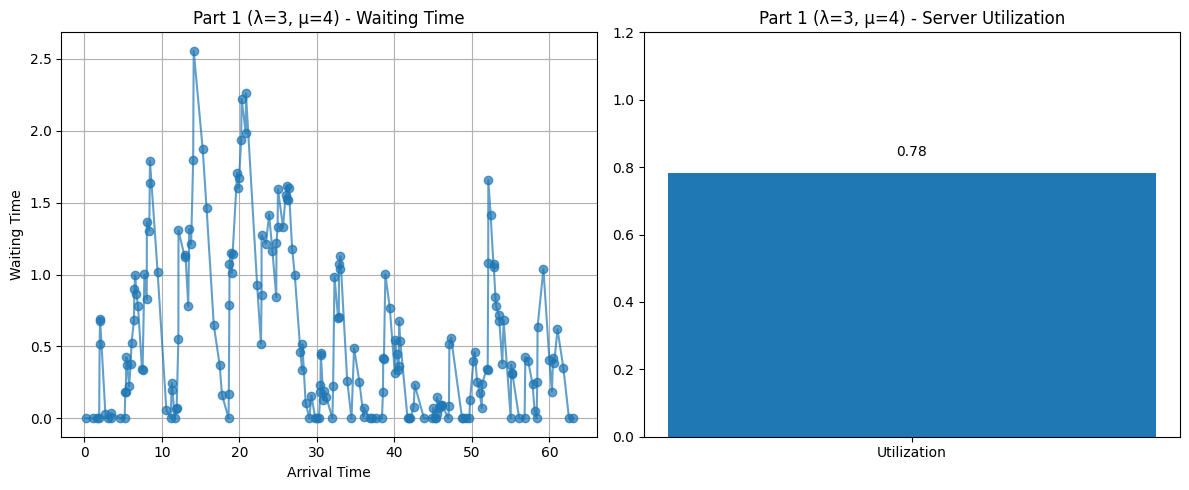


Part 2: λ=8, μ=6
Average Waiting Time: 5.4361
Server Utilization: 0.9828


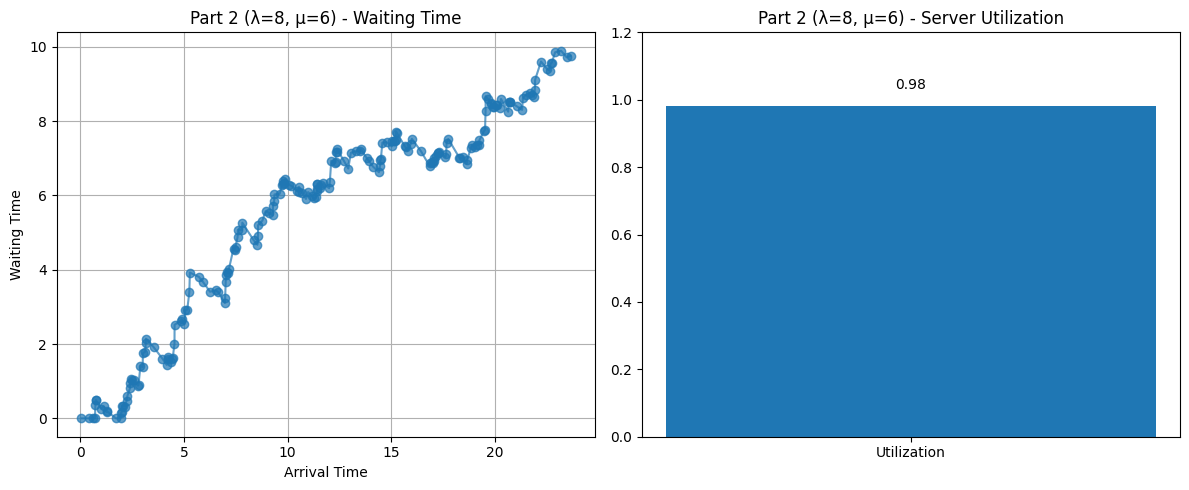


Part 3: λ=8, μ=6 with Queue Limit = 10
Average Waiting Time: 0.6175
Server Utilization: 1.1917
Customers Dropped: 14


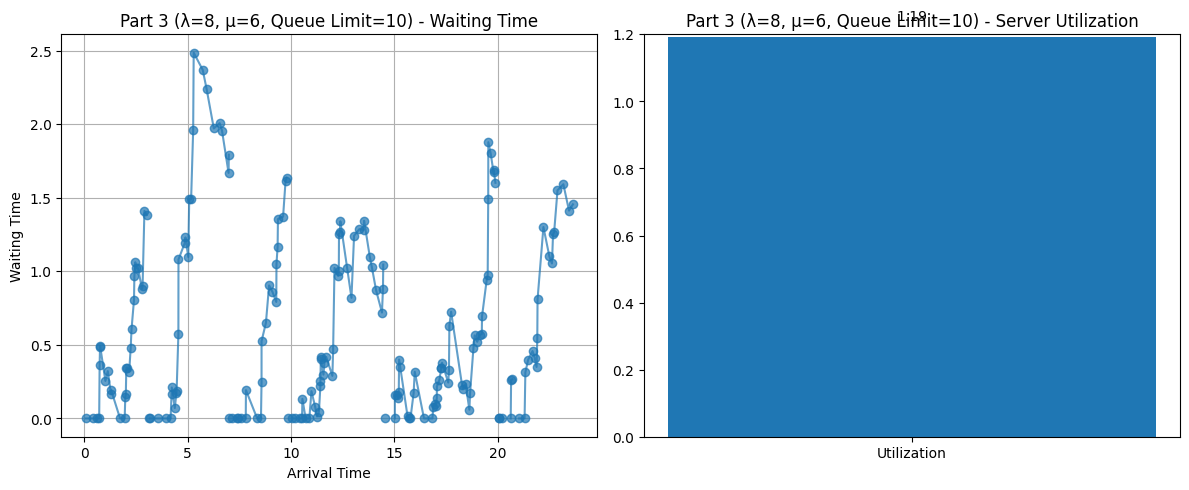

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_single_server(lambda_rate, mu_rate, num_customers=200, queue_limit=None):
    np.random.seed(42)

    interarrival_times = np.random.exponential(1 / lambda_rate, num_customers)
    arrival_times = np.cumsum(interarrival_times)
    service_times = np.random.exponential(1 / mu_rate, num_customers)

    start_service = np.zeros(num_customers)
    finish_service = np.zeros(num_customers)
    waiting_times = np.zeros(num_customers)
    queue_dropped = 0

    for i in range(num_customers):
        if i == 0:
            start_service[i] = arrival_times[i]
        else:
            start_service[i] = max(arrival_times[i], finish_service[i - 1])

        waiting_time = start_service[i] - arrival_times[i]

        if queue_limit is not None and waiting_time > 0:
            queue_length = np.sum((arrival_times < arrival_times[i]) & (finish_service > arrival_times[i]))
            if queue_length >= queue_limit:
                queue_dropped += 1
                waiting_times[i] = np.nan
                continue

        finish_service[i] = start_service[i] + service_times[i]
        waiting_times[i] = waiting_time

    valid_waits = waiting_times[~np.isnan(waiting_times)]
    avg_waiting_time = np.mean(valid_waits)
    busy_time = np.sum(service_times[~np.isnan(waiting_times)])
    total_time = finish_service[~np.isnan(waiting_times)].max() - arrival_times.min()
    utilization = busy_time / total_time

    return {
        'arrival_times': arrival_times,
        'waiting_times': waiting_times,
        'avg_waiting_time': avg_waiting_time,
        'utilization': utilization,
        'dropped_customers': queue_dropped
    }

def plot_results(results, title):
    plt.figure(figsize=(12, 5))

    # Waiting time plot
    plt.subplot(1, 2, 1)
    plt.plot(results['arrival_times'], results['waiting_times'], marker='o', linestyle='-', alpha=0.7)
    plt.title(f'{title} - Waiting Time')
    plt.xlabel('Arrival Time')
    plt.ylabel('Waiting Time')
    plt.grid(True)

    # Utilization and Stats
    plt.subplot(1, 2, 2)
    plt.bar(['Utilization'], [results['utilization']])
    plt.title(f'{title} - Server Utilization')
    plt.ylim(0, 1.2)
    plt.text(0, results['utilization'] + 0.05, f"{results['utilization']:.2f}", ha='center')

    plt.tight_layout()
    plt.show()

# ---- Run all three parts ----

# Part 1: λ = 3, μ = 4
res1 = simulate_single_server(lambda_rate=3, mu_rate=4)
print("Part 1: λ=3, μ=4")
print(f"Average Waiting Time: {res1['avg_waiting_time']:.4f}")
print(f"Server Utilization: {res1['utilization']:.4f}")
plot_results(res1, "Part 1 (λ=3, μ=4)")

# Part 2: λ = 8, μ = 6 (Overloaded system)
res2 = simulate_single_server(lambda_rate=8, mu_rate=6)
print("\nPart 2: λ=8, μ=6")
print(f"Average Waiting Time: {res2['avg_waiting_time']:.4f}")
print(f"Server Utilization: {res2['utilization']:.4f}")
plot_results(res2, "Part 2 (λ=8, μ=6)")

# Part 3: λ = 8, μ = 6 with queue limit = 10
res3 = simulate_single_server(lambda_rate=8, mu_rate=6, queue_limit=10)
print("\nPart 3: λ=8, μ=6 with Queue Limit = 10")
print(f"Average Waiting Time: {res3['avg_waiting_time']:.4f}")
print(f"Server Utilization: {res3['utilization']:.4f}")
print(f"Customers Dropped: {res3['dropped_customers']}")
plot_results(res3, "Part 3 (λ=8, μ=6, Queue Limit=10)")
